<h3>Import Library<h3>

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import SimpleRNN,Dense,Activation

<h3>Load Data<h3>

In [9]:
(X_train,Y_train),(X_test,Y_test)=imdb.load_data(path="ibdb.npz",
              num_words=None,
              skip_top=0,
              maxlen=None,
              seed=113,
              start_char=1,
               oov_char=2,
               index_from=3
              
              )

17473536/17464789 [==============================] - 4s 0us/step


In [11]:
print("Type",type(X_train))
print("Type",type(Y_train))
print("X train shape",X_train.shape)
print("Y train shape",Y_train.shape)


Type <class 'numpy.ndarray'>
Type <class 'numpy.ndarray'>
X train shape (25000,)
Y train shape (25000,)


<h3>EDA<h3>

In [12]:
print("Y train values:",np.unique(Y_train))
print("Y test values:",np.unique(Y_test))

unique,counts=np.unique(Y_train,return_counts=True)
print("Y train distrubition:",dict(zip(unique,counts)))

Y train values: [0 1]
Y test values: [0 1]
Y train distrubition: {0: 12500, 1: 12500}


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Y test')

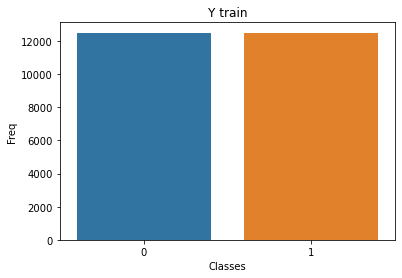

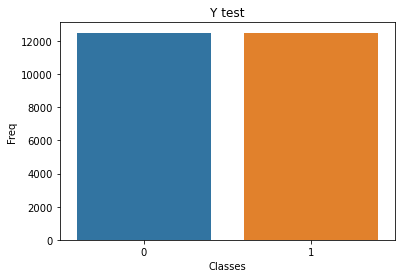

In [15]:
plt.figure()
sns.countplot(Y_train)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y train")

plt.figure()
sns.countplot(Y_test)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y test")

In [22]:
d=X_train[0]
len(d)

218

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

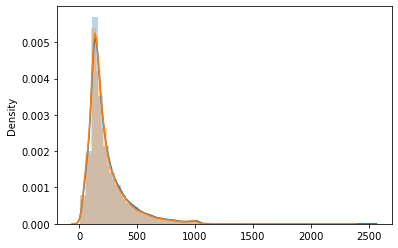

In [26]:
review_len_train=[]
review_len_test=[]
for i ,ii in zip(X_train,X_test):
    review_len_train.append(len(i))
    review_len_test.append(len(ii))

sns.distplot(review_len_train,hist_kws={"alpha":0.3})
sns.distplot(review_len_test,hist_kws={"alpha":0.3})

In [27]:
print("Train mean:",np.mean(review_len_train))
print("Test mean:",np.mean(review_len_test))

Train mean: 238.71364
Test mean: 230.8042


In [31]:
print("Train mean:",stats.mode(review_len_train))

Train mean: ModeResult(mode=array([132]), count=array([196]))


In [34]:
word_index=imdb.get_word_index()
print(len(word_index))

88584


In [37]:
for keys,values in word_index.items():
    if values==61:
        print(keys)

only


In [42]:
def whatItSay(index=24):
    reverse_index=dict([(value,key)for (key,value) in word_index.items()])
    decode_review=" ".join([reverse_index.get(i-3,"!")for i in X_train[index]])
    print(decode_review)
    print(Y_train[index])
    return decode_review

decode_review=whatItSay(61)

! please don't rent or even think about buying this movie they don't even have it available at the red box to rent which would cost a 1 i think its worth less than that the main reason why i rented this d movie was because jenna jameson is in the movie lol between 2 5 min i will give credit that the movie had hot chicks and quite a bit of nudity but other than that you might as well buy another d horror movie that has the same thing with nobody you know ginger lynn has more acting time in this movie than jenna she's not even on the front cover of the movie nor her name i recommend people to watch zombie strippers because you see jenna almost throughout the whole movie nude most of the time this movie is a big disappointment such a huge waste of time
0


<h3>Preprocess<h3>

In [46]:
num_words=15000
(X_train,Y_train),(X_test,Y_test)=imdb.load_data(num_words=num_words)
maxlen=130
X_train=pad_sequences(X_train,maxlen=maxlen)
X_test=pad_sequences(X_test,maxlen=maxlen) 

decode_review=whatItSay(5)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  778  128   74   12  630  163   15    4 1766 7982
 1051    2   32   85  156   45   40  148  139  121  664  665   10   10
 1361  173    4  749    2   16 3804    8    4  226   65   12   43  127
   24    2   10   10]
! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! begins better than it ends funny that the russian submarine crew ! all other actors it's like those scenes where documentary shots br br spoiler part the message !

<h3>RNN<h3>

In [48]:
rnn=Sequential()
rnn.add(Embedding(num_words,32,input_length=len(X_train[0])))
rnn.add(SimpleRNN(16,input_shape=(num_words,maxlen),return_sequences=False,activation="relu"))
rnn.add(Dense(1))
rnn.add(Activation("sigmoid"))
print(rnn.summary())
rnn.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 32)           480000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                784       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________
None


In [51]:
history=rnn.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=5,batch_size=128,verbose=1)


Epoch 1/5
196/196 [==============================] - 7s 29ms/step - loss: 0.5876 - accuracy: 0.7105 - val_loss: 0.4687 - val_accuracy: 0.8017
Epoch 2/5
196/196 [==============================] - 5s 27ms/step - loss: 0.3835 - accuracy: 0.8391 - val_loss: 0.3398 - val_accuracy: 0.8540
Epoch 3/5
196/196 [==============================] - 5s 26ms/step - loss: 0.2892 - accuracy: 0.8836 - val_loss: 0.3621 - val_accuracy: 0.8343
Epoch 4/5
196/196 [==============================] - 5s 27ms/step - loss: 0.2349 - accuracy: 0.9084 - val_loss: 0.3488 - val_accuracy: 0.8529
Epoch 5/5
196/196 [==============================] - 5s 26ms/step - loss: 0.2062 - accuracy: 0.9213 - val_loss: 0.5015 - val_accuracy: 0.7938


In [52]:
score=rnn.evaluate(X_test,Y_test)
print("Accuracy: % ",score[1]*100)

782/782 [==============================] - 4s 5ms/step - loss: 0.5015 - accuracy: 0.7938
Accuracy: %  79.37999963760376


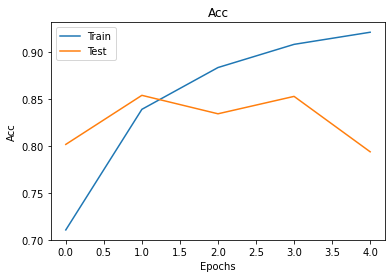

In [55]:
plt.figure()
plt.plot(history.history["accuracy"],label="Train")
plt.plot(history.history["val_accuracy"],label="Test")
plt.title("Acc")
plt.ylabel("Acc")
plt.xlabel("Epochs")
plt.legend()
plt.show()


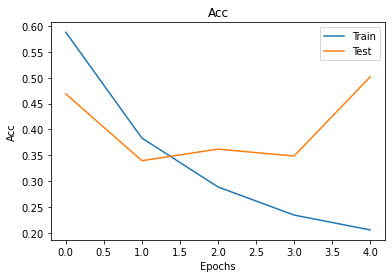

In [56]:
plt.figure()
plt.plot(history.history["loss"],label="Train")
plt.plot(history.history["val_loss"],label="Test")
plt.title("Acc")
plt.ylabel("Acc")
plt.xlabel("Epochs")
plt.legend()
plt.show()